<a href="https://colab.research.google.com/github/Vladm0z/HSE_Biotech/blob/main/seminar3_CpG_freq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

#Seq object

In [ ]:
from Bio.Seq import Seq
gene = Seq("GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGGTCGCTCCCATGGCA"
            "GCACAGGCTGCGGAAATTACGTTAGTCCCGTCAGTAAAATTACAGATAGGCGATCGTGAT"
            "AATCGTGGCTATTACTGGGATGGAGGTCACTGGCGCGACCACGGCTGGTGGAAACAACAT"
            "TATGAATGGCGAGGCAATCGCTGGCACCTACACGGACCGCCGCCACCGCCGCGCCACCAT"
            "AAGAAAGCTCCTCATGATCATCACGGCGGTCATGGTCCAGGCAAACATCACCGCTAA")
float(gene.count("G") + gene.count("C"))/len(gene)

0.5387205387205387

In [ ]:
gene = Seq("CGCCGCGcg")
gene.upper().count("CG")

4

In [ ]:
gene = Seq("AAAA")
gene.upper().count("AA")

2

#Функции

In [ ]:
def init_di_nt_dict():
  all_nt = ['A', 'C', 'G', 'T']
  di_nt_dict = {}
  for nt1 in all_nt:
    for nt2 in all_nt:
      di_nt_dict[nt1+nt2] = 0
  return di_nt_dict

In [ ]:
def count_di_nt_in_seq(seq):
  di_nt_dict = init_di_nt_dict()
  for di_nt in di_nt_dict.keys():
    di_nt_dict[di_nt] = seq.count(di_nt)
  return di_nt_dict

In [ ]:
def count_mono_nt_in_seq(seq):
  all_nt = ['A', 'C', 'G', 'T']
  count_dict = {}
  for nt in all_nt:
    count_dict[nt] = seq.count(nt)
  return count_dict

In [ ]:
def mono_nt_freq_in_seq(seq):
  counts_dict = count_mono_nt_in_seq(seq)
  total_counts = sum(counts_dict.values())

  freq_dict = {}
  for k in counts_dict.keys():
    freq_dict[k] = counts_dict[k]/total_counts

  return freq_dict

In [ ]:
def di_nt_freq_in_seq(seq):
  di_nt_counts = count_di_nt_in_seq(seq)
  total_counts = sum(di_nt_counts.values())

  di_nt_freq = {}
  for di_nt in di_nt_counts.keys():
    di_nt_freq[di_nt] = di_nt_counts[di_nt]/total_counts

  return di_nt_freq

#Анализ

In [ ]:
# Human: https://www.ncbi.nlm.nih.gov/genome/?term=human
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(db="nucleotide", id="NC_000022.11", rettype="fasta", retmode="text") as handle:
    chr22_record = SeqIO.read(handle, "fasta")
chr22_record

SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN'), id='NC_000022.11', name='NC_000022.11', description='NC_000022.11 Homo sapiens chromosome 22, GRCh38.p13 Primary Assembly', dbxrefs=[])

In [ ]:
with Entrez.efetch(db="nucleotide", id="NC_000085.7", rettype="fasta", retmode="text") as handle:
    mouse_record = SeqIO.read(handle, "fasta")
mouse_record

SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN'), id='NC_000085.7', name='NC_000085.7', description='NC_000085.7 Mus musculus strain C57BL/6J chromosome 19, GRCm39', dbxrefs=[])

In [ ]:
with Entrez.efetch(db="nucleotide", id="NC_000913", rettype="fasta", retmode="text") as handle:
    bact_record = SeqIO.read(handle, "fasta")
bact_record

SeqRecord(seq=Seq('AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAG...TTC'), id='NC_000913.3', name='NC_000913.3', description='NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome', dbxrefs=[])

In [ ]:
with Entrez.efetch(db="nucleotide", id="NC_003076.8", rettype="fasta", retmode="text") as handle:
    arabidosis_record = SeqIO.read(handle, "fasta")
arabidosis_record

SeqRecord(seq=Seq('TATACCATGTACCCTCAACCTTAAAACCCTAAAACCTATACTATAAATCTTTAA...ATC'), id='NC_003076.8', name='NC_003076.8', description='NC_003076.8 Arabidopsis thaliana chromosome 5 sequence', dbxrefs=[])

In [ ]:
# target_record = chr22_record
#target_record = mouse_record
#target_record = bact_record
target_record = arabidosis_record
target_seq = target_record.seq.upper()

In [ ]:
with Entrez.efetch(db="nucleotide", id="JMSD01000001.1", rettype="fasta", retmode="text") as handle:
    target_record = SeqIO.read(handle, "fasta")
target_seq = target_record.seq.upper()
target_record

SeqRecord(seq=Seq('TTATAAGGGACATAGCTAATTTTCTTTTAATCAACTTTATATTAACTCTTTTAG...GTT'), id='JMSD01000001.1', name='JMSD01000001.1', description='JMSD01000001.1 Paramecium caudatum strain 43c3d scaffold_0001, whole genome shotgun sequence', dbxrefs=[])

In [ ]:
target_seq.count('N')

3240

In [ ]:
len(target_seq)

793585

In [ ]:
target_seq.count("CG")

5465

In [ ]:
target_seq.count("GC")

17498

In [ ]:
di_nt_freq_dict = di_nt_freq_in_seq(target_seq)
di_nt_freq_dict

{'AA': 0.10830916361798666,
 'AC': 0.04302072003779264,
 'AG': 0.059350383968886984,
 'AT': 0.13933840897355612,
 'CA': 0.06183052635048285,
 'CC': 0.021424530063830022,
 'CG': 0.00750497127099744,
 'CT': 0.0558402821264955,
 'GA': 0.06104638388099711,
 'GC': 0.024029640860002418,
 'GG': 0.023233138876987136,
 'GT': 0.045694494798018084,
 'TA': 0.11883809586588005,
 'TC': 0.05812404557089966,
 'TG': 0.06391516429913319,
 'TT': 0.10850004943805412}

In [ ]:
import pandas as pd

plot_df = pd.DataFrame(di_nt_freq_dict.items())
plot_df.columns = ['di_nt', 'freq']
plot_df['type'] = 'seq_di_nt'
plot_df

,di_nt,freq,type
0,AA,0.108309,seq_di_nt
1,AC,0.043021,seq_di_nt
2,AG,0.059350,seq_di_nt
3,AT,0.139338,seq_di_nt
4,CA,0.061831,seq_di_nt
5,CC,0.021425,seq_di_nt
6,CG,0.007505,seq_di_nt
7,CT,0.055840,seq_di_nt
8,GA,0.061046,seq_di_nt
9,GC,0.024030,seq_di_nt


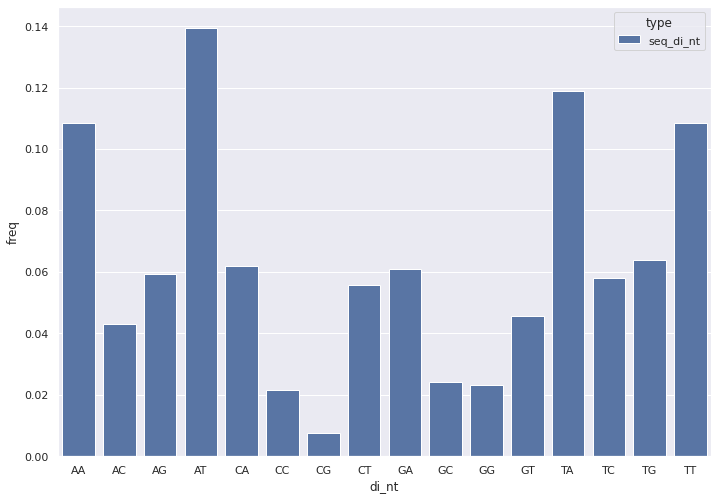

In [ ]:
import seaborn as sns

valor_plot = sns.barplot(
    data= plot_df,
    x= 'di_nt',
    y= 'freq',
    hue='type')

##Вычисляем ожидаемые частоты ди-нуклеотидов

In [ ]:
mono_nt_freqs = mono_nt_freq_in_seq(target_seq)
mono_nt_freqs

{'A': 0.35901663197717454,
 'C': 0.1376563399528054,
 'G': 0.14480891256350076,
 'T': 0.3585181155065193}

In [ ]:
expected_di_nt_freqs = init_di_nt_dict()
expected_di_nt_freqs

{'AA': 0,
 'AC': 0,
 'AG': 0,
 'AT': 0,
 'CA': 0,
 'CC': 0,
 'CG': 0,
 'CT': 0,
 'GA': 0,
 'GC': 0,
 'GG': 0,
 'GT': 0,
 'TA': 0,
 'TC': 0,
 'TG': 0,
 'TT': 0}

In [ ]:
for k in expected_di_nt_freqs.keys():
  freq1 = mono_nt_freqs[k[0]]
  freq2 = mono_nt_freqs[k[1]]
  expected_di_nt_freqs[k] = freq1*freq2
  #print('%s = %s * %s' % (k, freq1, freq2))
expected_di_nt_freqs

{'AA': 0.12889294203623397,
 'AC': 0.04942091554016117,
 'AG': 0.0519888080688252,
 'AT': 0.1287139663319542,
 'CA': 0.04942091554016117,
 'CC': 0.01894926792920233,
 'CG': 0.019933864896037334,
 'CT': 0.049352291587404576,
 'GA': 0.0519888080688252,
 'GC': 0.019933864896037334,
 'GG': 0.02096962115782361,
 'GT': 0.05191661844081462,
 'TA': 0.1287139663319542,
 'TC': 0.049352291587404576,
 'TG': 0.05191661844081462,
 'TT': 0.1285352391463459}

In [ ]:
expected_df = pd.DataFrame(expected_di_nt_freqs.items())
expected_df.columns = ['di_nt', 'freq']
expected_df['type'] = 'expected'
expected_df

,di_nt,freq,type
0,AA,0.128893,expected
1,AC,0.049421,expected
2,AG,0.051989,expected
3,AT,0.128714,expected
4,CA,0.049421,expected
5,CC,0.018949,expected
6,CG,0.019934,expected
7,CT,0.049352,expected
8,GA,0.051989,expected
9,GC,0.019934,expected


Text(0.5, 1.0, 'JMSD01000001.1 Paramecium caudatum strain 43c3d scaffold_0001, whole genome shotgun sequence')

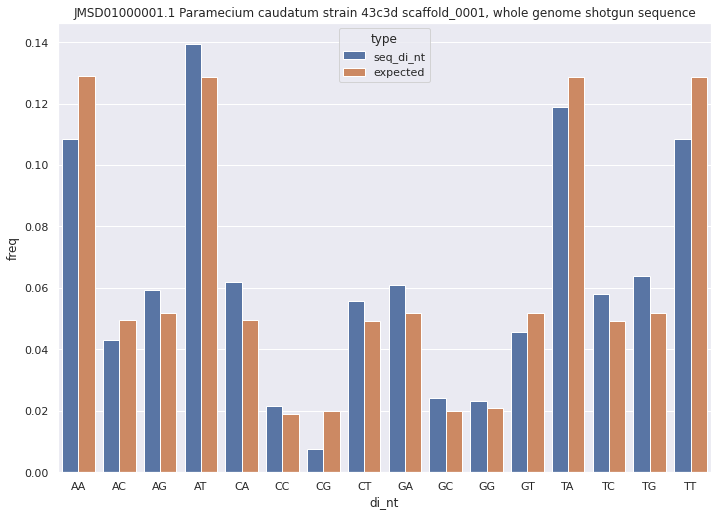

In [ ]:
# Fig size: https://stackoverflow.com/a/47955814/310453
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(
    data= pd.concat([plot_df, expected_df]),
    x= 'di_nt',
    y= 'freq',
    hue='type'
).set_title(target_record.description)

Вычисляем ожидаемые частоты ди-нуклеотидов

In [ ]:
mono_nt_freqs = mono_nt_freq_in_seq(target_seq)
mono_nt_freqs

{'A': 0.35901663197717454,
 'C': 0.1376563399528054,
 'G': 0.14480891256350076,
 'T': 0.3585181155065193}

In [ ]:
expected_di_nt_freqs = init_di_nt_dict()
expected_di_nt_freqs

{'AA': 0,
 'AC': 0,
 'AG': 0,
 'AT': 0,
 'CA': 0,
 'CC': 0,
 'CG': 0,
 'CT': 0,
 'GA': 0,
 'GC': 0,
 'GG': 0,
 'GT': 0,
 'TA': 0,
 'TC': 0,
 'TG': 0,
 'TT': 0}

In [ ]:
for k in expected_di_nt_freqs.keys():
  freq1 = mono_nt_freqs[k[0]]
  freq2 = mono_nt_freqs[k[1]]
  expected_di_nt_freqs[k] = freq1*freq2
  #print('%s = %s * %s' % (k, freq1, freq2))
expected_di_nt_freqs

{'AA': 0.12889294203623397,
 'AC': 0.04942091554016117,
 'AG': 0.0519888080688252,
 'AT': 0.1287139663319542,
 'CA': 0.04942091554016117,
 'CC': 0.01894926792920233,
 'CG': 0.019933864896037334,
 'CT': 0.049352291587404576,
 'GA': 0.0519888080688252,
 'GC': 0.019933864896037334,
 'GG': 0.02096962115782361,
 'GT': 0.05191661844081462,
 'TA': 0.1287139663319542,
 'TC': 0.049352291587404576,
 'TG': 0.05191661844081462,
 'TT': 0.1285352391463459}

In [ ]:
expected_df = pd.DataFrame(expected_di_nt_freqs.items())
expected_df.columns = ['di_nt', 'freq']
expected_df['type'] = 'expected'
expected_df

,di_nt,freq,type
0,AA,0.128893,expected
1,AC,0.049421,expected
2,AG,0.051989,expected
3,AT,0.128714,expected
4,CA,0.049421,expected
5,CC,0.018949,expected
6,CG,0.019934,expected
7,CT,0.049352,expected
8,GA,0.051989,expected
9,GC,0.019934,expected


In [ ]:
pd.concat([plot_df, expected_df]).head()

,di_nt,freq,type
0,AA,0.108309,seq_di_nt
1,AC,0.043021,seq_di_nt
2,AG,0.059350,seq_di_nt
3,AT,0.139338,seq_di_nt
4,CA,0.061831,seq_di_nt


Text(0.5, 1.0, 'JMSD01000001.1 Paramecium caudatum strain 43c3d scaffold_0001, whole genome shotgun sequence')

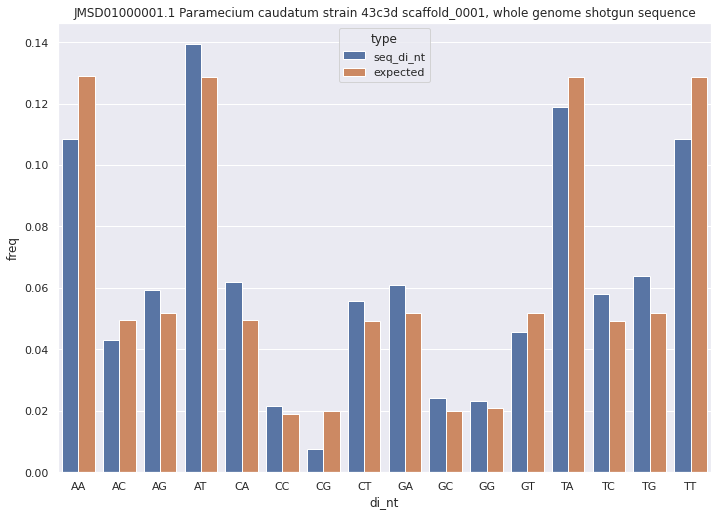

In [ ]:
# Fig size: https://stackoverflow.com/a/47955814/310453
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(
    data= pd.concat([plot_df, expected_df]),
    x= 'di_nt',
    y= 'freq',
    hue='type'
).set_title(target_record.description)

##Перемешиваем нт в исходной последовательности

In [ ]:
import re
rand_seq = re.compile(r'[^ACGT]').sub('', str(target_seq))
print("%s => %s" % (len(target_seq), len(rand_seq)))

793585 => 790345


In [ ]:
rand_seq[1:20]

'TATAAGGGACATAGCTAAT'

In [ ]:
from random import shuffle

nt_list = list(rand_seq)
shuffle(nt_list)   # shuffles in place!
rand_seq = ''.join(nt_list)
rand_seq[1:20]

'AAACGAAAAGATGCTTATT'

In [ ]:
rand_freq_dict = di_nt_freq_in_seq(rand_seq)
rand_freq_dict

{'AA': 0.10210039305601049,
 'AC': 0.05291925974451359,
 'AG': 0.05616333660880009,
 'AT': 0.13928785893656512,
 'CA': 0.05360301342941369,
 'CC': 0.018013702369254286,
 'CG': 0.021377879681187904,
 'CT': 0.05304345452560323,
 'GA': 0.0562206572769953,
 'GC': 0.02164674091057976,
 'GG': 0.019820668195217817,
 'GT': 0.055594224260290426,
 'TA': 0.1385467845834698,
 'TC': 0.053458346981111474,
 'TG': 0.055920406157877495,
 'TT': 0.10228327328310952}

In [ ]:
rand_df = pd.DataFrame(rand_freq_dict.items())
rand_df.columns = ['di_nt', 'freq']
rand_df['type'] = 'random'
rand_df.head()

,di_nt,freq,type
0,AA,0.102100,random
1,AC,0.052919,random
2,AG,0.056163,random
3,AT,0.139288,random
4,CA,0.053603,random


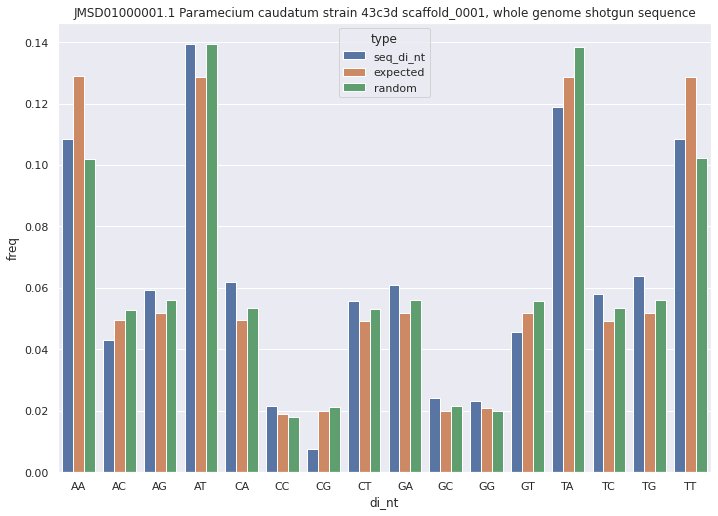

In [ ]:
_ = sns.barplot(
    data= pd.concat([plot_df, expected_df, rand_df]),
    x= 'di_nt',
    y= 'freq',
    hue='type'
).set_title(target_record.description)